# ASSIGNMENT 2
This assignment is a classification problem where we have features as input and numeric variable "Tip" as output

## IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

## READING, CHECKING AND PLOTTING THE DATASET

In [2]:
df = pd.read_csv('TIP_DATA.csv')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Let's split the data set into features and target

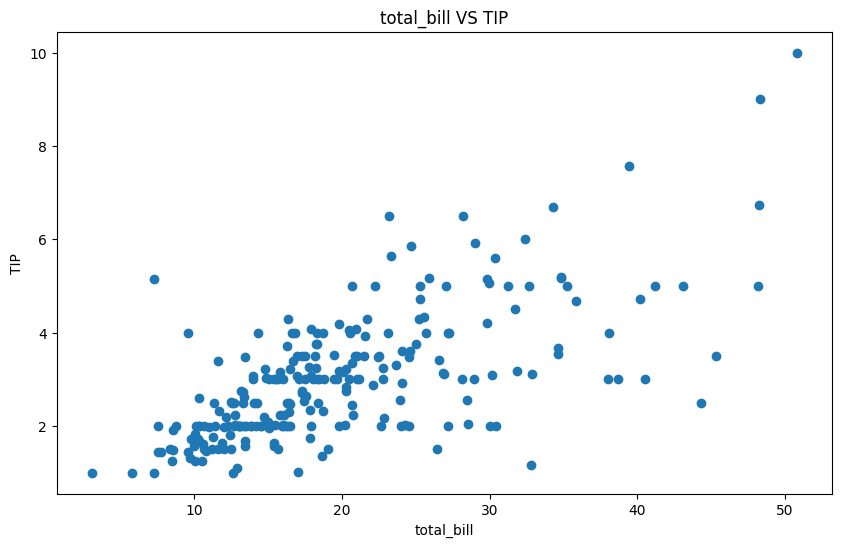

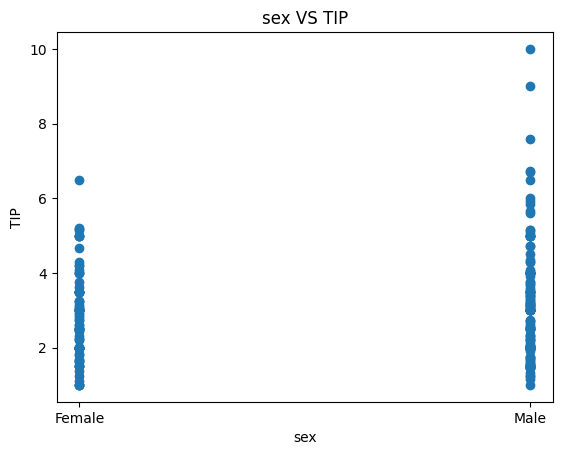

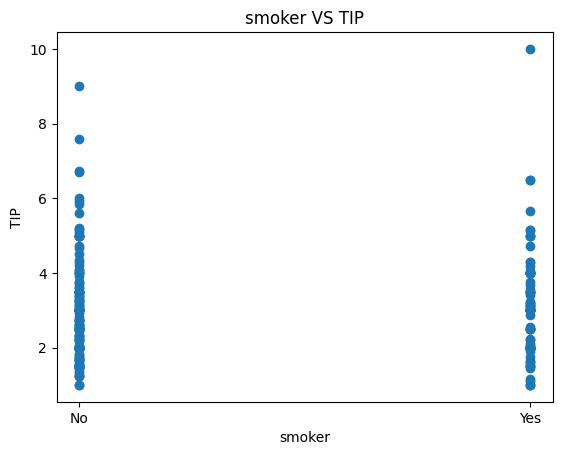

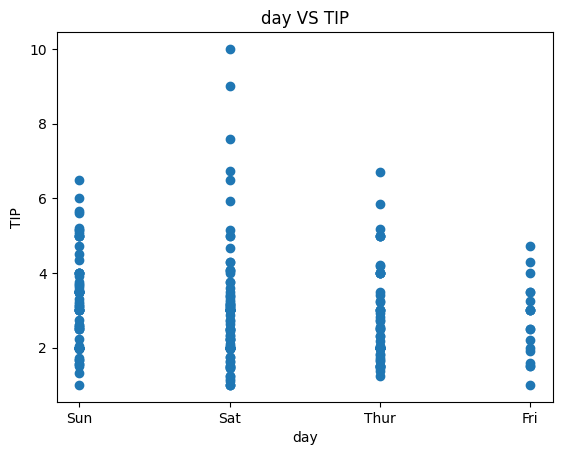

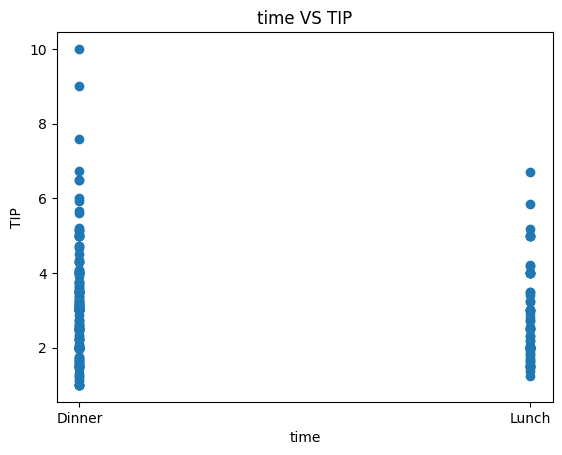

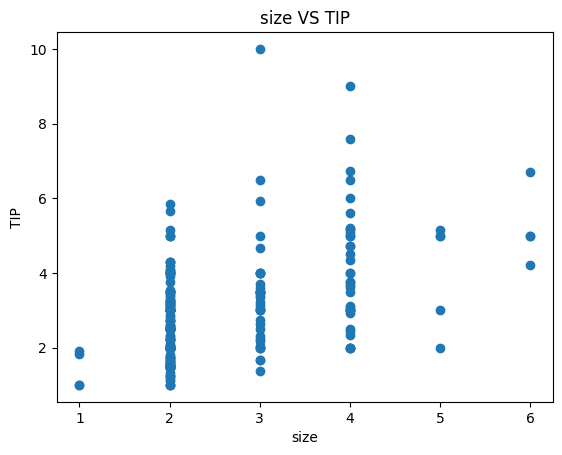

In [5]:
data = df.drop(columns=['tip'])
target = df['tip']

plt.figure(figsize=(10, 6))
# Making a scatter plot to visualize data
for i in range(0,6):
    plt.scatter(data.iloc[:,i], target)
    plt.xlabel(data.columns[i])
    plt.ylabel('TIP')
    plt.title(data.columns[i] + ' VS TIP')
    plt.show()

Let's checl average tip per day

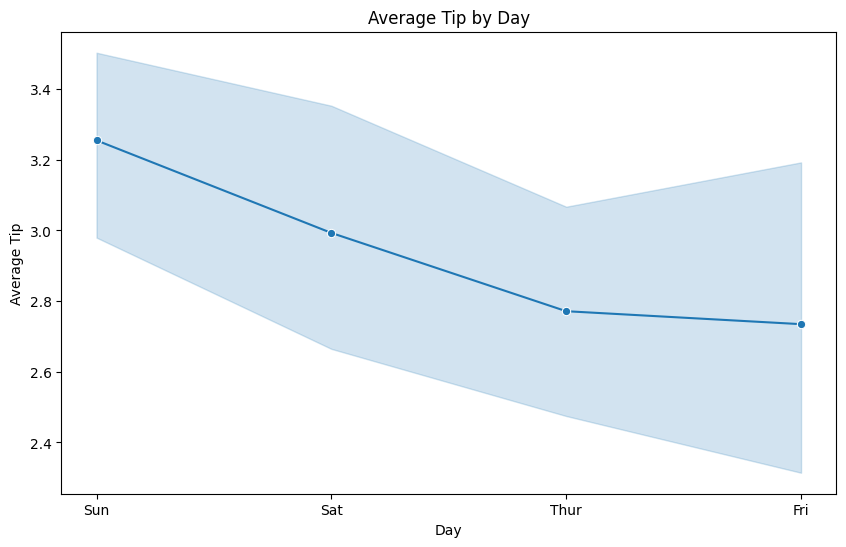

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

We notice the following :

a) total bill proportional to tip

b) tip during dinner > tip during lunch

c) Most tips are recieved on sundays

d) tips by men > tips by women

e) smokers and non-smokers tip about equally

f) high variance in tip amount on saturdays

Now let's make a pairplot

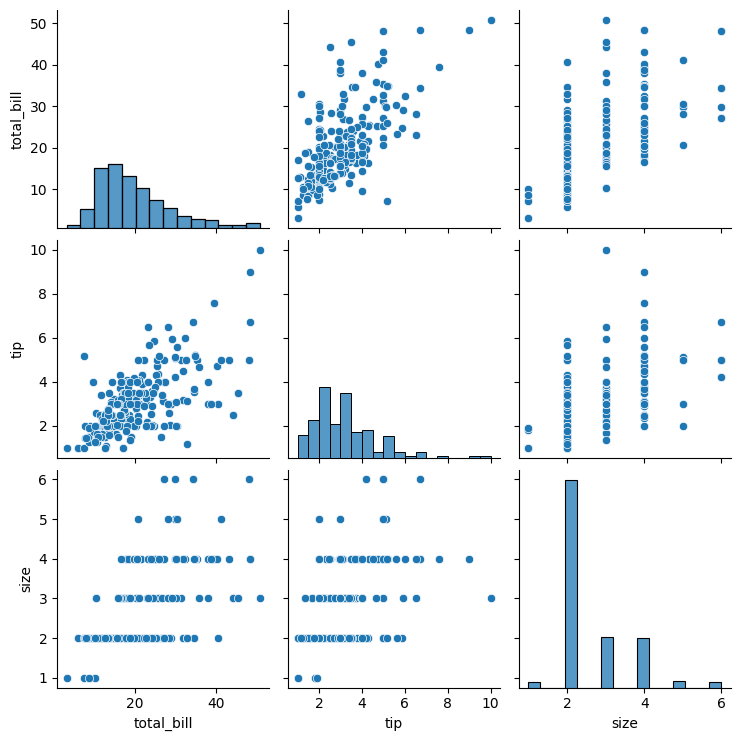

In [7]:
sns.pairplot(df)

Let's create a correlation matrix

<Axes: >

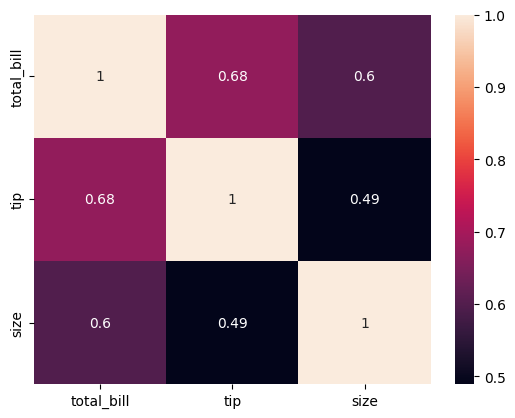

In [8]:
change_df = df[['total_bill', 'tip', 'size']].copy()
corr = change_df.corr()
sns.heatmap(corr, annot=True)

We have found noticeabe correlation between tip - total bill & tip - size

## LABEL ENCODING

In [9]:
Label_Encoder = LabelEncoder()
data['sex'] = Label_Encoder.fit_transform(df['sex'])
data['smoker'] = Label_Encoder.fit_transform(df['smoker'])
data['day'] = Label_Encoder.fit_transform(df['day'])
data['time'] = Label_Encoder.fit_transform(df['time'])

## RAINBOW TEST

In [10]:
import statsmodels.api as sm
# Define independent (X) and dependent (y) variables
X = data
X = sm.add_constant(X)
y = target

# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [11]:
from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2036274510126599
P-value: 0.15798464222013184


here,as the p value is greater than 0.05, we accept the null hypothesis and reject the alternative hypothesis. This means that the regression is correctly modelled as linear.

## REGRESSION ANALYSIS

In [12]:
tips_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

X = tips_encoded.drop(columns='tip')
y = tips_encoded['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Evaluate model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression -\nMSE:", mse_lr, "\nR^2:", r2_lr, "\nRMSE:", np.sqrt(mse_lr))

Linear Regression -
MSE: 0.7033566017436105 
R^2: 0.43730181943482505 
RMSE: 0.838663580790063


Ridge Regression

In [14]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression -\nMSE:", mse_ridge, "\nR^2:", r2_ridge, "\nRMSE:", np.sqrt(mse_ridge))

Ridge Regression -
MSE: 0.7007477213216073 
R^2: 0.4393889716178486 
RMSE: 0.8371067562274285


Lasso Regression

In [15]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression -\nMSE:", mse_lasso, "\nR^2:", r2_lasso, "\nRMSE:", np.sqrt(mse_lasso))

Lasso Regression -
MSE: 0.5908528649971524 
R^2: 0.5273068720881755 
RMSE: 0.768669542129225


Decision Tree

In [16]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluate model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree -\nMSE:", mse_tree, "\nR^2:", r2_tree, "\nRMSE:", np.sqrt(mse_tree))

Decision Tree -
MSE: 1.2551938775510205 
R^2: -0.004178121600921791 
RMSE: 1.120354353564541


Random Forest

In [17]:
forest = RandomForestRegressor(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Evaluate model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest -\nMSE:", mse_forest, "\nR^2:", r2_forest, "\nRMSE:", np.sqrt(mse_forest))

Random Forest -
MSE: 0.9196720148979602 
R^2: 0.2642455218065466 
RMSE: 0.9589953153680993


Support Vector Regression

In [18]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression -\nMSE:", mse_svr, "\nR^2:", r2_svr, "\nRMSE:", np.sqrt(mse_svr))

Support Vector Regression -
MSE: 0.6524534436627769 
R^2: 0.47802527943520123 
RMSE: 0.8077459029068342


K-Nearest Neighbors

In [19]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors -\nMSE:", mse_knn, "\nR^2:", r2_knn, "\nRMSE:", np.sqrt(mse_knn))

K-Nearest Neighbors -
MSE: 0.8763725714285714 
R^2: 0.29888587066985495 
RMSE: 0.9361477294896203


Check coefficients in Lasso model for feature importance

In [20]:
feature_importance = pd.Series(lasso.coef_, index=X.columns)
significant_features = feature_importance[feature_importance != 0].sort_values(ascending=False)
print("Significant Factors impacting tips:")
print(significant_features)

Significant Factors impacting tips:
size          0.108081
total_bill    0.099099
dtype: float64


HERE BEST MODEL IS LASSO REGRESSION AS IT HAS HIGHEST R^2 AND LOWEST MSE

## PLOTTING RESIDUALS

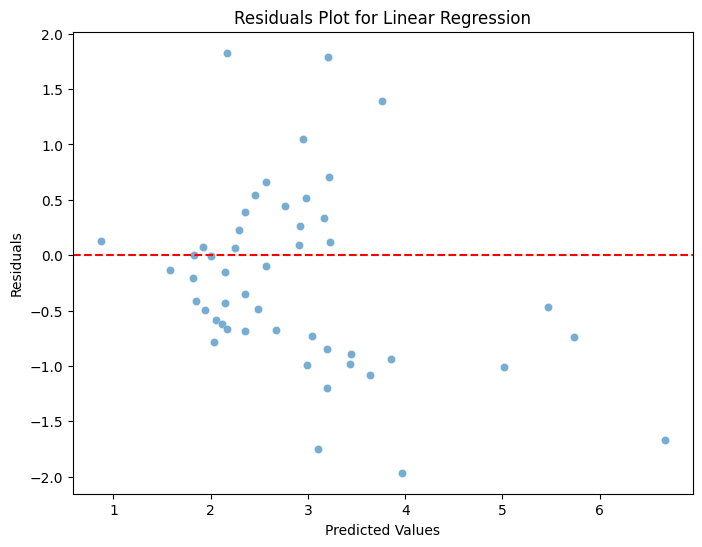

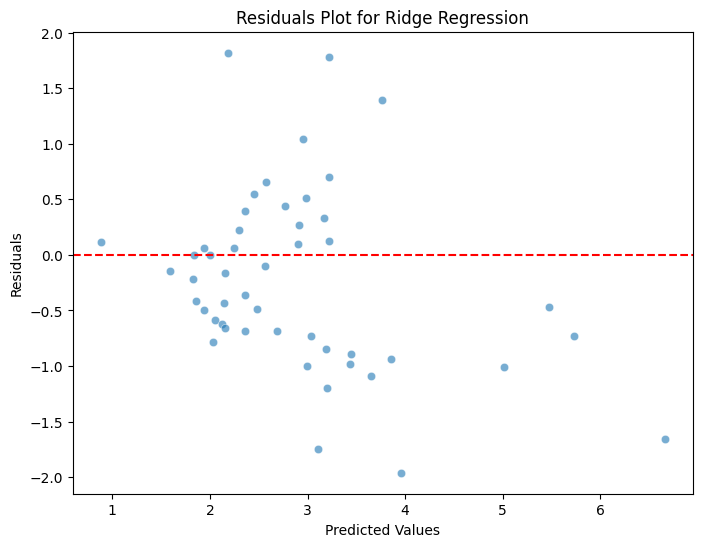

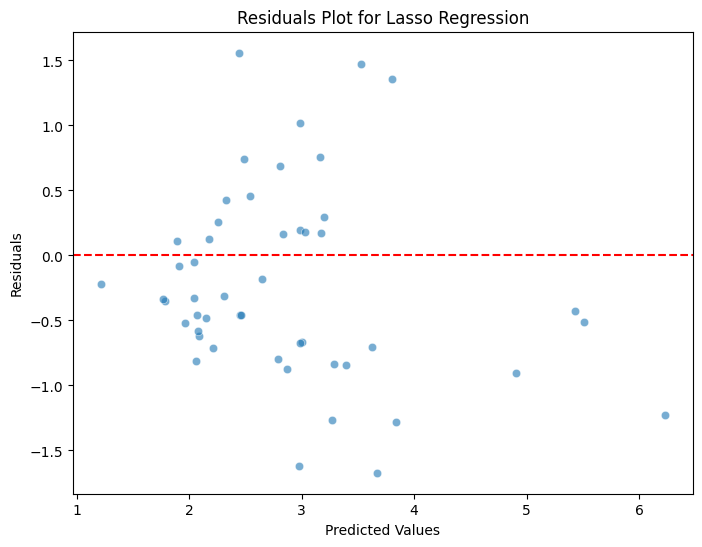

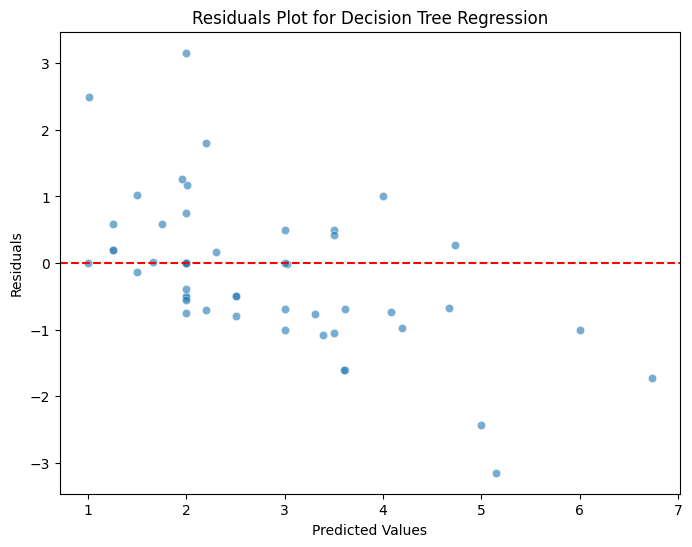

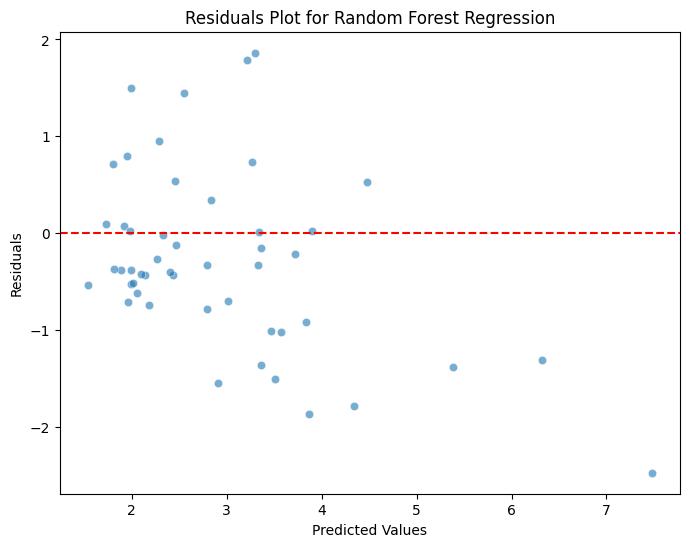

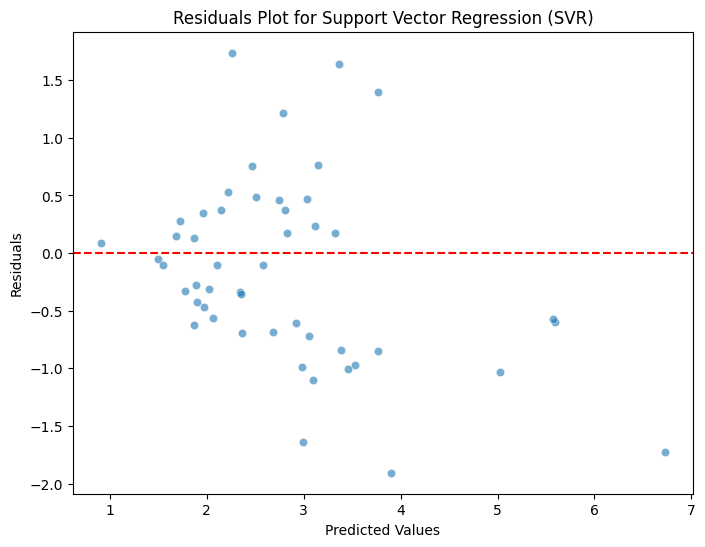

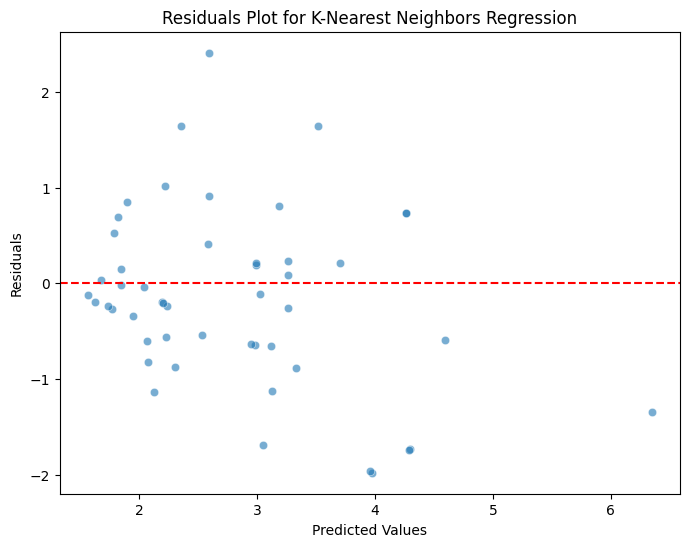

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a helper function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
y_pred_lr = lin_reg.predict(X_test)
plot_residuals(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = lasso.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = tree.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
y_pred_knn = knn.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

From residual plots we see that desicion tree have least residuals, so it maybe overfitting the data

## CONCLUSION

a) As saturdays are unpredictable, focus should be on improving serice on friday and maintaining good service on sunday.

b) size is proportional to tip amount so higher number of people shopuld be allowed to sit on a table.

c) dinner time should be focused upon to increase tip amount.